In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [11]:
class_url = "https://raw.githubusercontent.com/yijiaceline/Machine-Learning-Zoo-Classification/master/class.csv"
class_animals = pd.read_csv(class_url, sep=',', on_bad_lines='skip')

In [12]:
class_animals

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [14]:
zoo_url = "https://raw.githubusercontent.com/yijiaceline/Machine-Learning-Zoo-Classification/master/zoo.csv"
zoo = pd.read_csv(zoo_url, sep=",")

In [15]:
zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [17]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [22]:
# data preprocessing - check for missing values, duplicates
print(zoo.isnull().sum())
print(zoo.class_type.unique())
dup = zoo.duplicated()
print(dup[dup>1])

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64
[1 4 2 7 6 5 3]
Series([], dtype: bool)


In [23]:
#check for duplicates in animal_name
dup_animal_names = zoo.animal_name.value_counts()
dup_animal_names[dup_animal_names > 1]

frog    2
Name: animal_name, dtype: int64

In [24]:
#check to see if there is any difference between the two frogs
zoo.loc[zoo['animal_name'] == 'frog']

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [25]:
#one frog is venomous and the other is not; separate them into to different kinds
zoo['animal_name'][(zoo.venomous == 1 )& (zoo.animal_name == 'frog')] = "venoumous_frog"

/var/folders/_l/n4ppbg51587_2v2m3yw1btz00000gq/T/ipykernel_4402/806431837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zoo['animal_name'][(zoo.venomous == 1 )& (zoo.animal_name == 'frog')] = "venoumous_frog"


In [26]:
zoo.loc[zoo['animal_name'] == 'venoumous_frog']

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
26,venoumous_frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [31]:
class_animals

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [46]:
class_animals.loc[4, 'Animal_Names'] = ['frog, frog, newt, toad, venoumous_frog']

In [47]:
class_animals[class_animals['Class_Type'] == 'Amphibian']['Animal_Names'].to_list()

[['frog, frog, newt, toad, venoumous_frog']]

In [48]:
df = pd.merge(zoo,class_animals,how='left',left_on='class_type',right_on='Class_Number')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


In [63]:
# df.loc[(df['class_type'] == df['Class_Number']) == True]
# can drop unnecessary row class_type or Class_Number

<AxesSubplot:xlabel='Class_Type', ylabel='count'>

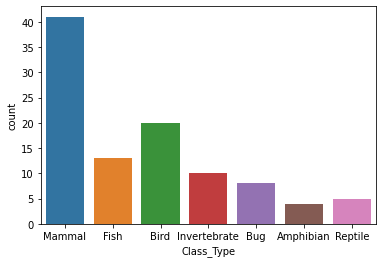

In [68]:
sns.countplot(data=df, x='Class_Type')

In [73]:
# train test split 
from sklearn.model_selection import train_test_split
X = zoo.iloc[:,1:17]
y = zoo.iloc[:,17]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [86]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Why do we have fit_transform for training data & transform for test data
#https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

### KNN Classifier

In [87]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [88]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob

array([[0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.8, 0.2],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0.4, 0.2, 0. , 0.2],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.8, 0.2, 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. ,

In [89]:
y_pred = model.predict(X_test)
y_pred

array([6, 1, 2, 2, 1, 4, 6, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2,
       1, 2, 6, 7])

In [90]:
y_test

88    6
27    1
59    2
16    2
74    1
92    4
81    7
6     1
65    1
73    4
29    1
36    1
50    1
64    1
98    1
69    1
75    1
1     1
76    3
28    1
35    1
56    2
45    1
79    2
99    7
85    7
Name: class_type, dtype: int64

In [91]:
#Classification Metrics - To check the final results
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

result1 = accuracy_score(y_test, y_pred)
print('Accuracy is: ', result1*100)

#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

Accuracy is:  88.46153846153845


### Decision Tree Classifier

In [92]:
#Call the Classifier
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [93]:
y_pred_dt = model_dt.predict(X_test)

In [94]:
#Classification Metrics - To check the final results
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

result1 = accuracy_score(y_test, y_pred_dt)
print('Accuracy is: ', result1*100)

Accuracy is:  88.46153846153845


### Random Forest Classifier

In [95]:
#Call the Classifier
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [96]:
y_pred_rf = model_rf.predict(X_test)

In [97]:
#Classification Metrics - To check the final results
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

result1 = accuracy_score(y_test, y_pred_rf)
print('Accuracy is: ', result1*100)

Accuracy is:  88.46153846153845
